In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print("-----------------------------------------------------------------")

id
140699    1
2         1
8         1
26        1
30        1
         ..
214       1
222       1
232       1
239       1
240       1
Name: count, Length: 27898, dtype: int64
-----------------------------------------------------------------
Gender
Male      15546
Female    12352
Name: count, dtype: int64
-----------------------------------------------------------------
Age
24.0    2258
20.0    2236
28.0    2133
29.0    1949
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1261
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64
-----------------------------------------------------------------
City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vas

In [9]:
data=df.copy()

In [10]:
data['Academic Pressure']=data['Academic Pressure'].replace({0:'low',1:'low',2:'Moderate',3:'Moderate',4:'high',5:'high'})

In [11]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [12]:
data['Work Pressure']=data['Work Pressure'].replace({0:'low',2:'Moderate',5:'high'})

In [13]:
data['Study Satisfaction']=data['Study Satisfaction'].replace({0:'Very Dissatisfied',1:'Very Dissatisfied',2:'Dissatisfied',3:'Neutral',4:'Satisfied',5:'Very Satisfied'})

In [14]:
data['Job Satisfaction']=data['Job Satisfaction'].replace({0:'Very Dissatisfied',1:'Dissatisfied',2:'Dissatisfied',3:'Neutral',4:'Satisfied'})

In [15]:
data['Financial Stress']=data['Financial Stress'].replace({1:'Very Low Stress',2:'Low Stress',3:'Moderate Stress',4:'High Stress',5:'Very High Stress'})

In [16]:
data['Depression']=data['Depression'].replace({1:'Yes',0:'No'})

In [17]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,high,low,8.97,Dissatisfied,Very Dissatisfied,5-6 hours,Healthy,B.Pharm,Yes,3.0,Very Low Stress,No,Yes
1,8,Female,24.0,Bangalore,Student,Moderate,low,5.90,Very Satisfied,Very Dissatisfied,5-6 hours,Moderate,BSc,No,3.0,Low Stress,Yes,No
2,26,Male,31.0,Srinagar,Student,Moderate,low,7.03,Very Satisfied,Very Dissatisfied,Less than 5 hours,Healthy,BA,No,9.0,Very Low Stress,Yes,No
3,30,Female,28.0,Varanasi,Student,Moderate,low,5.59,Dissatisfied,Very Dissatisfied,7-8 hours,Moderate,BCA,Yes,4.0,Very High Stress,Yes,Yes
4,32,Female,25.0,Jaipur,Student,high,low,8.13,Neutral,Very Dissatisfied,5-6 hours,Moderate,M.Tech,Yes,1.0,Very Low Stress,No,No


In [18]:
data.describe()

,id,Age,CGPA,Work/Study Hours
count,27898.000000,27898.000000,27898.000000,27898.000000
mean,70442.953402,25.822174,7.656160,7.156570
std,40642.015063,4.905651,1.470708,3.707598
min,2.000000,18.000000,0.000000,0.000000
25%,35040.750000,21.000000,6.290000,4.000000
50%,70689.000000,25.000000,7.770000,8.000000
75%,105824.750000,30.000000,8.920000,10.000000
max,140699.000000,59.000000,10.000000,12.000000


# Detect Outliers 

<Axes: >

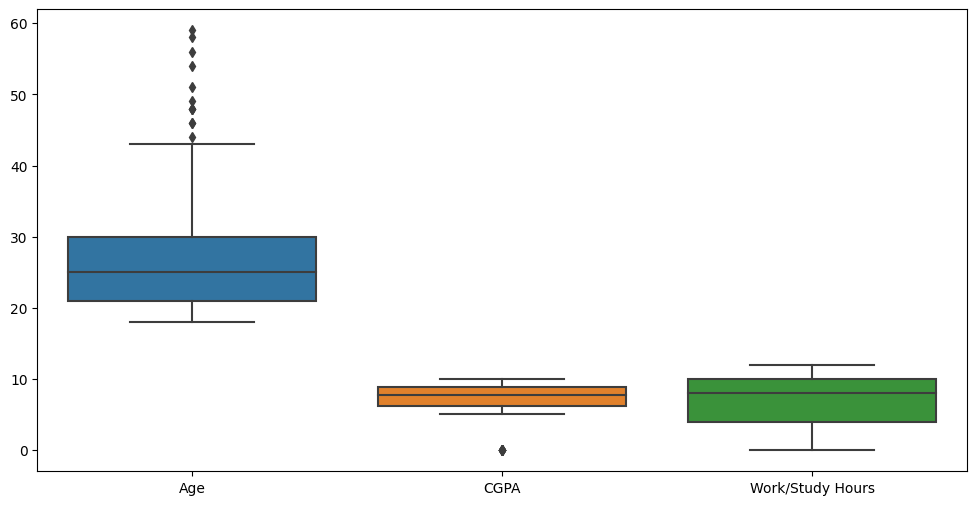

In [19]:
numerical_columns = data.select_dtypes(include=['number']).columns[1:]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns]) 

# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

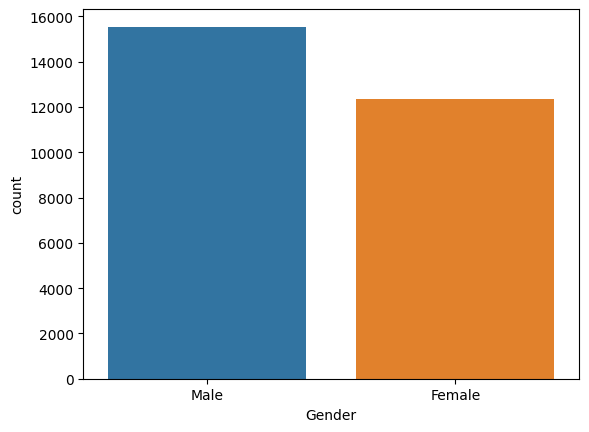

In [20]:
sns.countplot(data=data,x=data['Gender'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

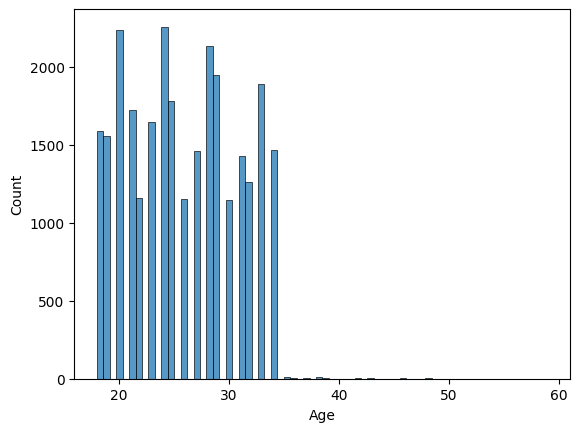

In [21]:
sns.histplot(data=data,x=data['Age'])

<Axes: xlabel='count', ylabel='Profession'>

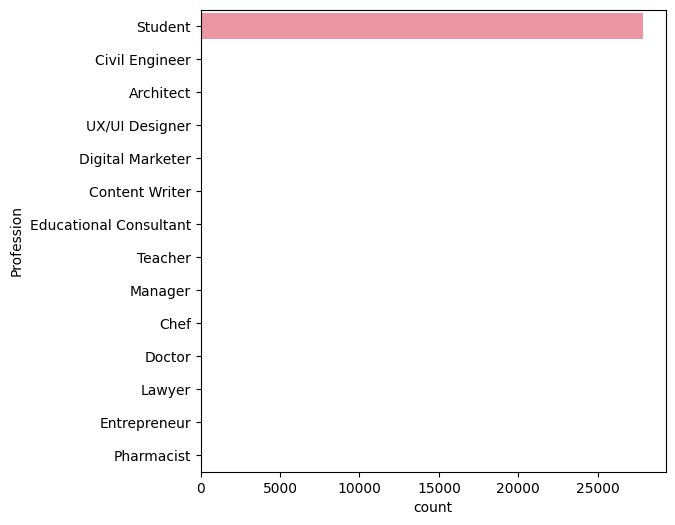

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data,y=data['Profession'])

<Axes: xlabel='Academic Pressure', ylabel='count'>

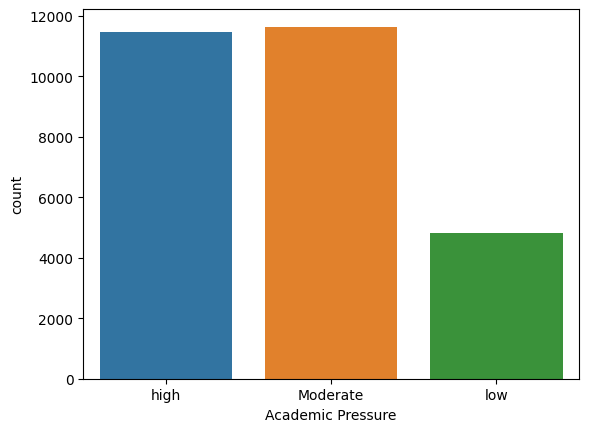

In [23]:
sns.countplot(data=data,x=data['Academic Pressure'])

<Axes: xlabel='Work Pressure', ylabel='count'>

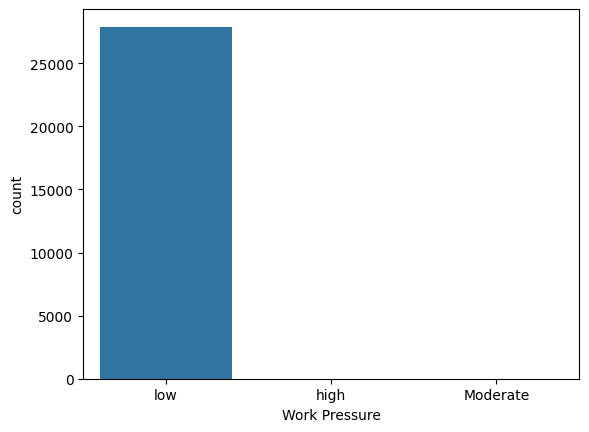

In [24]:
sns.countplot(data=data,x=data['Work Pressure'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CGPA', ylabel='Count'>

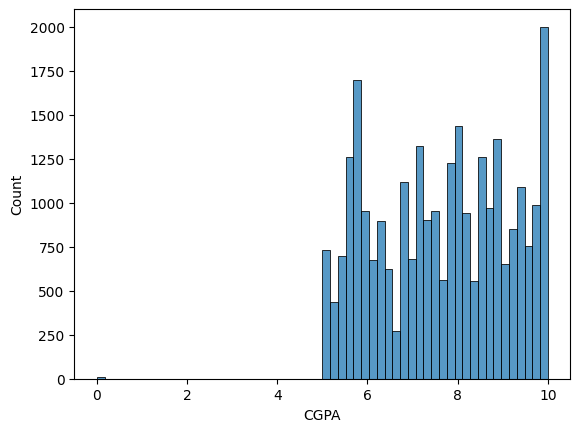

In [25]:
sns.histplot(data=data,x=data['CGPA'])

<Axes: xlabel='Study Satisfaction', ylabel='count'>

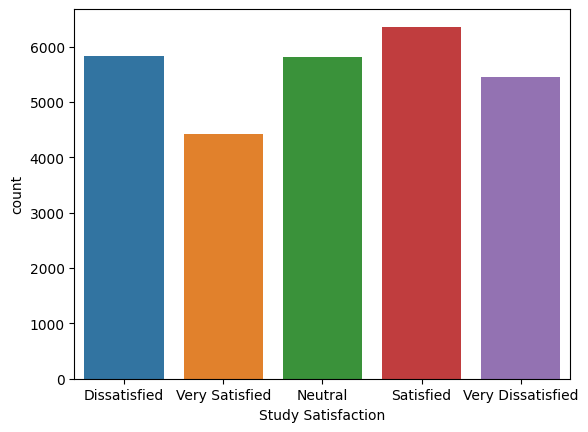

In [26]:
sns.countplot(data=data,x=data['Study Satisfaction'])

<Axes: xlabel='Job Satisfaction', ylabel='count'>

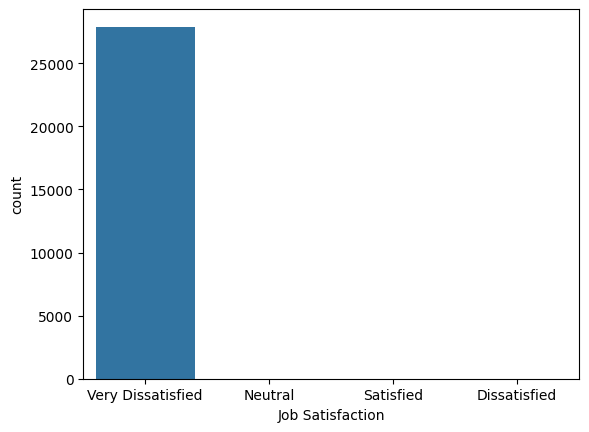

In [27]:
sns.countplot(data=data,x=data['Job Satisfaction'])

<Axes: xlabel='Sleep Duration', ylabel='count'>

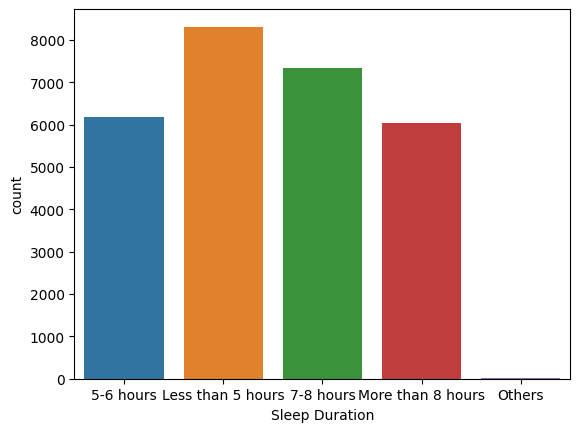

In [28]:
sns.countplot(data=data,x=data['Sleep Duration'])

<Axes: xlabel='Dietary Habits', ylabel='count'>

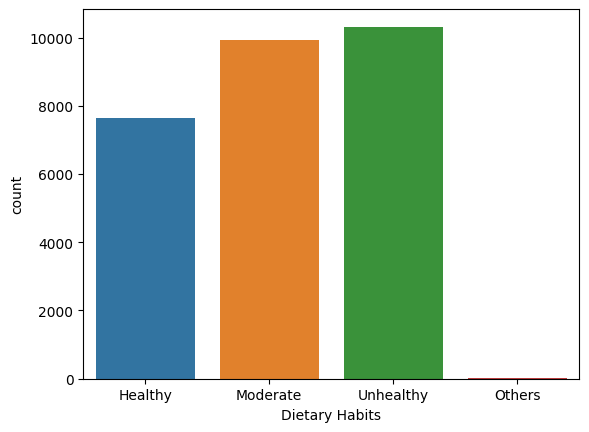

In [29]:
sns.countplot(data=data,x=data['Dietary Habits'])

In [30]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

<Axes: xlabel='count', ylabel='Degree'>

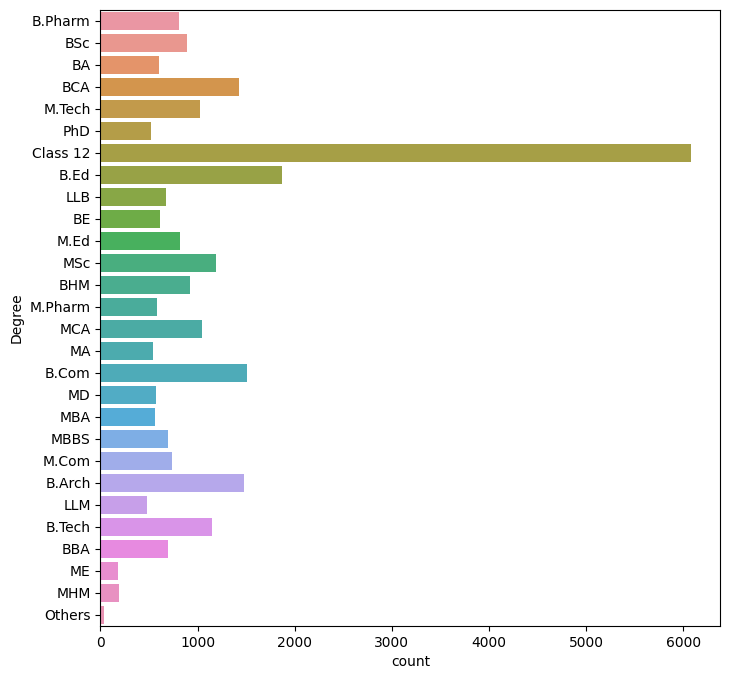

In [31]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,y=data['Degree'])

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

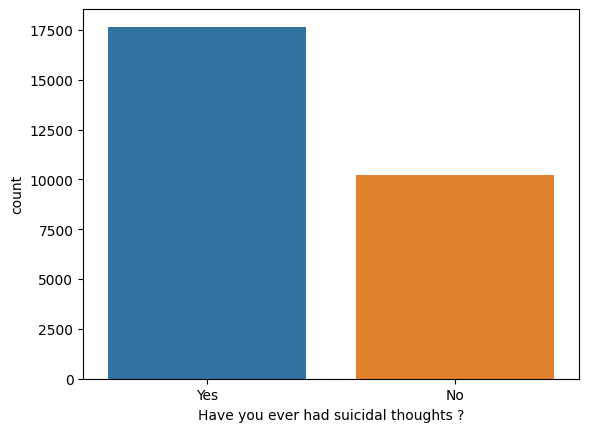

In [32]:
sns.countplot(data=data,x=data['Have you ever had suicidal thoughts ?'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Work/Study Hours', ylabel='Count'>

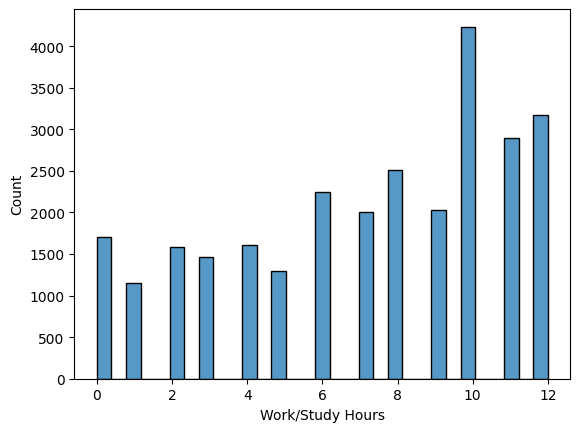

In [33]:
sns.histplot(data=data,x=data['Work/Study Hours'])

<Axes: xlabel='Financial Stress', ylabel='count'>

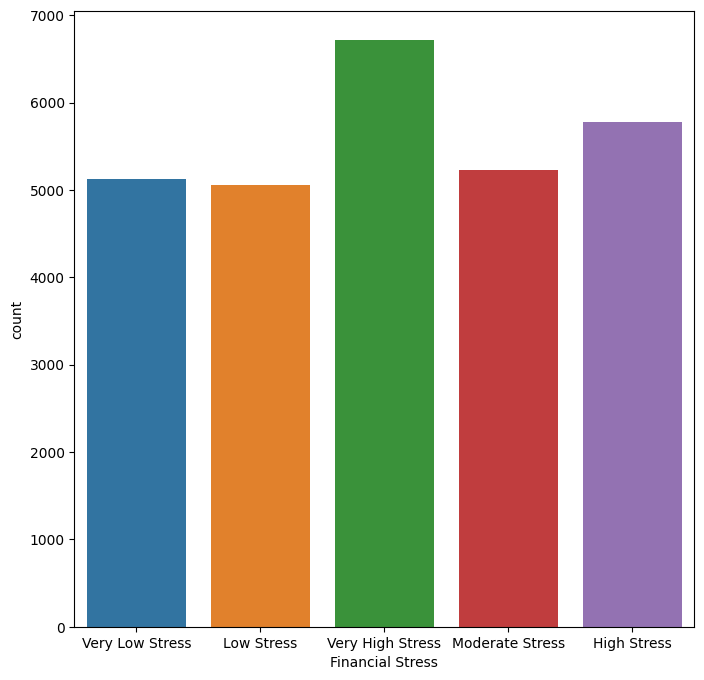

In [34]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,x=data['Financial Stress'])

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

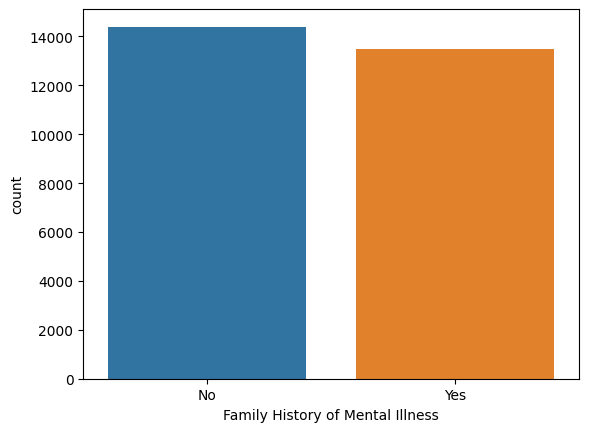

In [35]:
sns.countplot(data=data,x=data['Family History of Mental Illness'])

<Axes: xlabel='Depression', ylabel='count'>

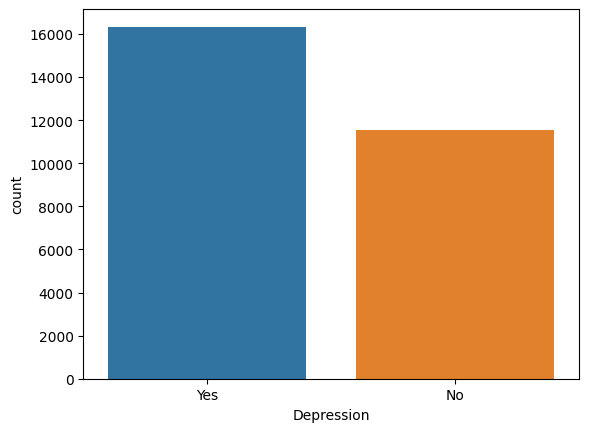

In [36]:
sns.countplot(data=data,x=data['Depression'])

<Axes: xlabel='count', ylabel='Profession'>

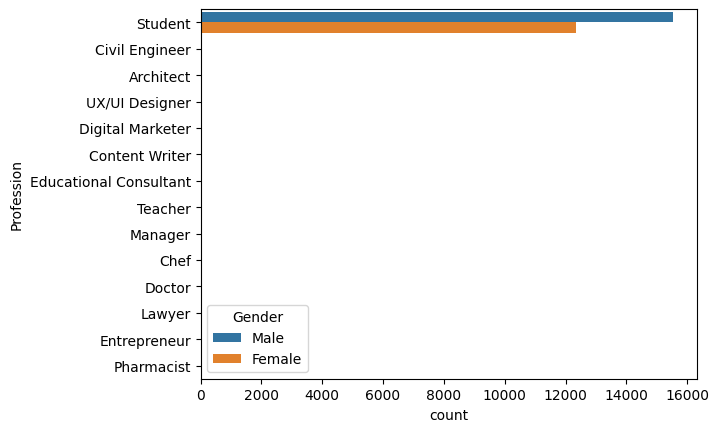

In [37]:
sns.countplot(data=data,y=data['Profession'],hue='Gender')

<Axes: xlabel='count', ylabel='Depression'>

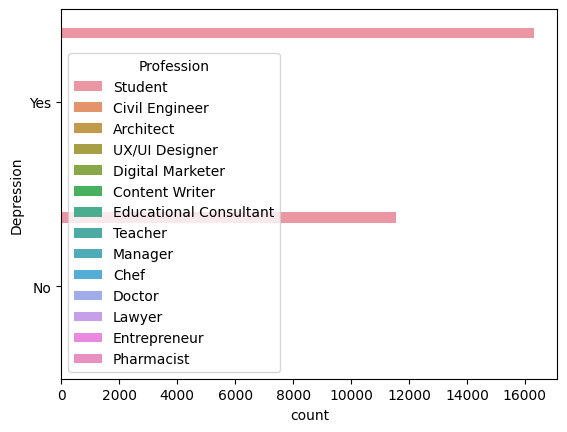

In [38]:
sns.countplot(data=data,y=data['Depression'],hue='Profession')

# **Students are the most that have depression**

<Axes: xlabel='Depression', ylabel='count'>

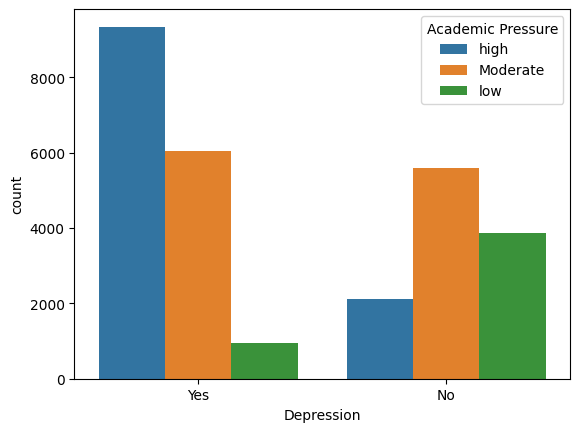

In [39]:
sns.countplot(data=data,x=data['Depression'],hue='Academic Pressure')

<Axes: xlabel='Depression', ylabel='count'>

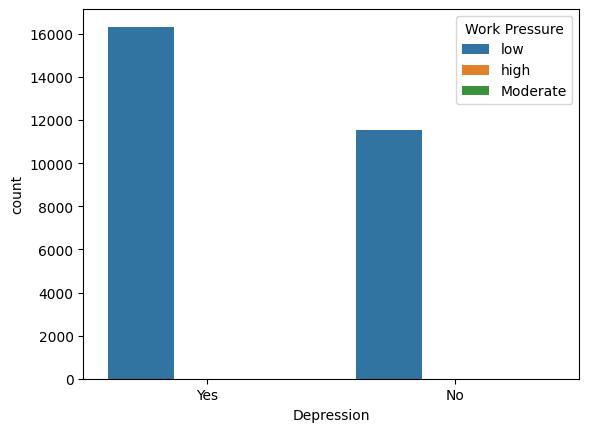

In [40]:
sns.countplot(data=data,x=data['Depression'],hue='Work Pressure')

<Axes: xlabel='Depression', ylabel='CGPA'>

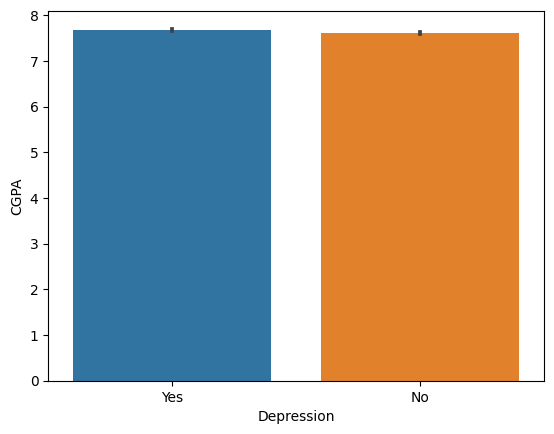

In [41]:
sns.barplot(data=data, y='CGPA', x='Depression')

<Axes: xlabel='Study Satisfaction', ylabel='count'>

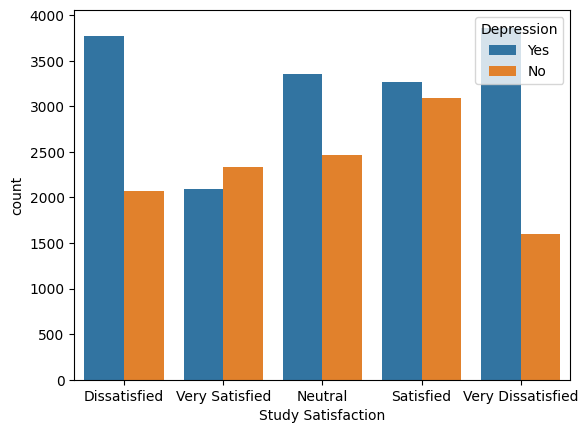

In [42]:
sns.countplot(data=data,x=data['Study Satisfaction'],hue='Depression')

<Axes: xlabel='Study Satisfaction', ylabel='count'>

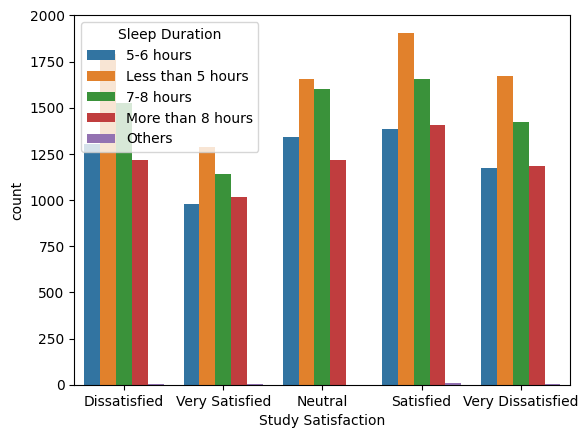

In [43]:
sns.countplot(data=data,x=data['Study Satisfaction'],hue='Sleep Duration')

<Axes: xlabel='Work/Study Hours', ylabel='count'>

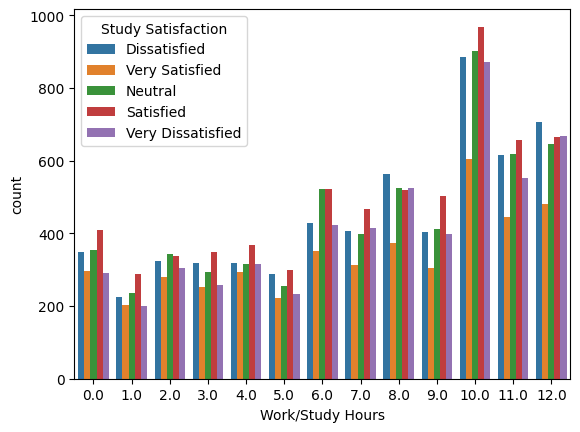

In [44]:
sns.countplot(data=data,x=data['Work/Study Hours'],hue='Study Satisfaction')

<Axes: xlabel='Job Satisfaction', ylabel='count'>

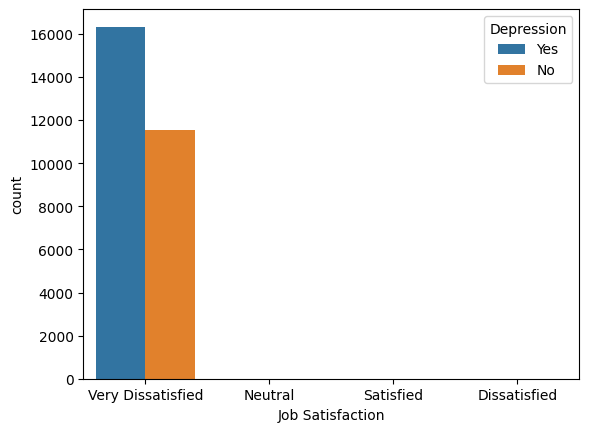

In [45]:
sns.countplot(data=data,x=data['Job Satisfaction'],hue='Depression')

<Axes: xlabel='Job Satisfaction', ylabel='count'>

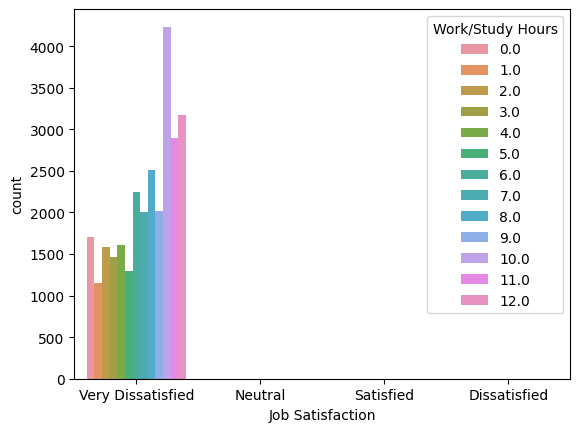

In [46]:
sns.countplot(data=data,x=data['Job Satisfaction'],hue='Work/Study Hours')

<Axes: xlabel='Job Satisfaction', ylabel='count'>

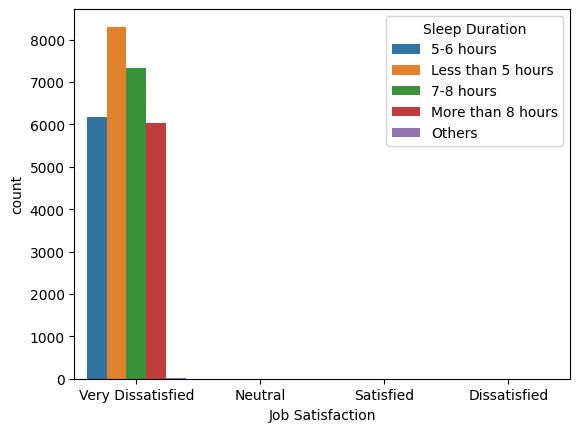

In [47]:
sns.countplot(data=data,x=data['Job Satisfaction'],hue='Sleep Duration')

<Axes: xlabel='Depression', ylabel='count'>

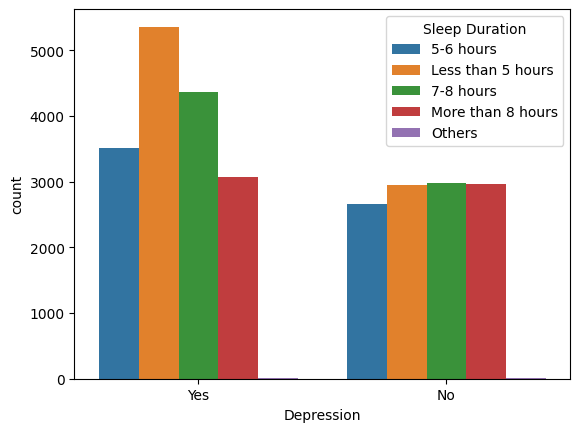

In [48]:
sns.countplot(data=data,x=data['Depression'],hue='Sleep Duration')

# People who sleep less than 5 hours are more likely to experience depression

<Axes: xlabel='Depression', ylabel='count'>

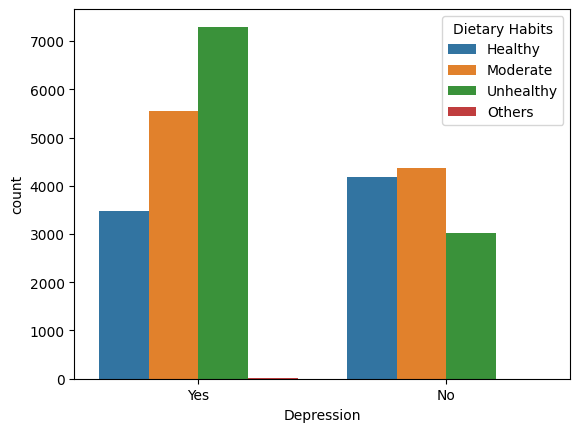

In [49]:
sns.countplot(data=data,x=data['Depression'],hue='Dietary Habits')

<Axes: xlabel='Gender', ylabel='count'>

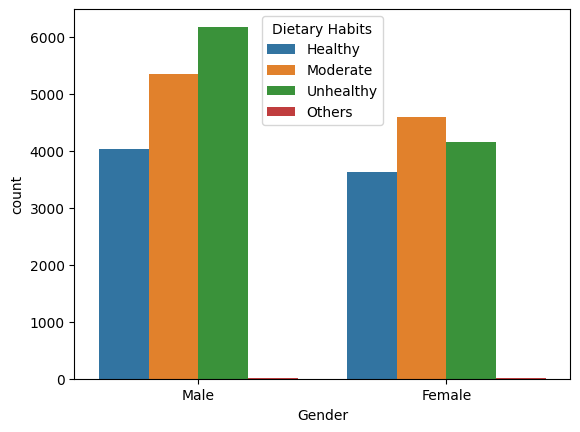

In [50]:
sns.countplot(data=data,x=data['Gender'],hue='Dietary Habits')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

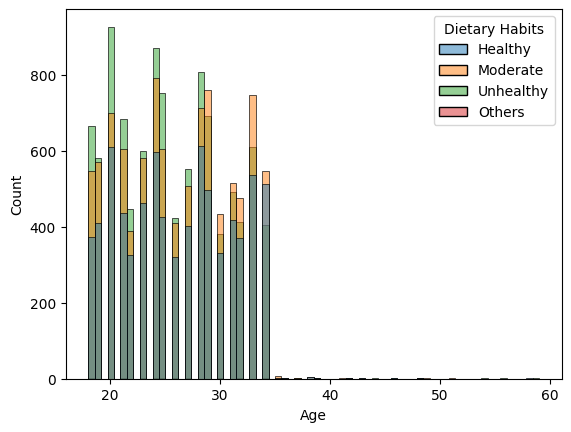

In [51]:
sns.histplot(data=data,x=data['Age'],hue='Dietary Habits')

<Axes: xlabel='count', ylabel='Degree'>

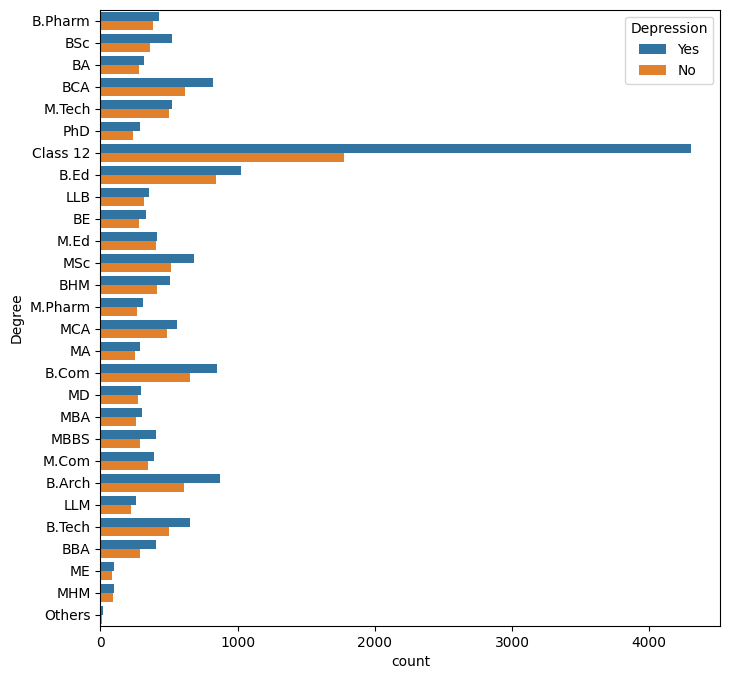

In [52]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,y=data['Degree'],hue='Depression')

<Axes: xlabel='count', ylabel='Degree'>

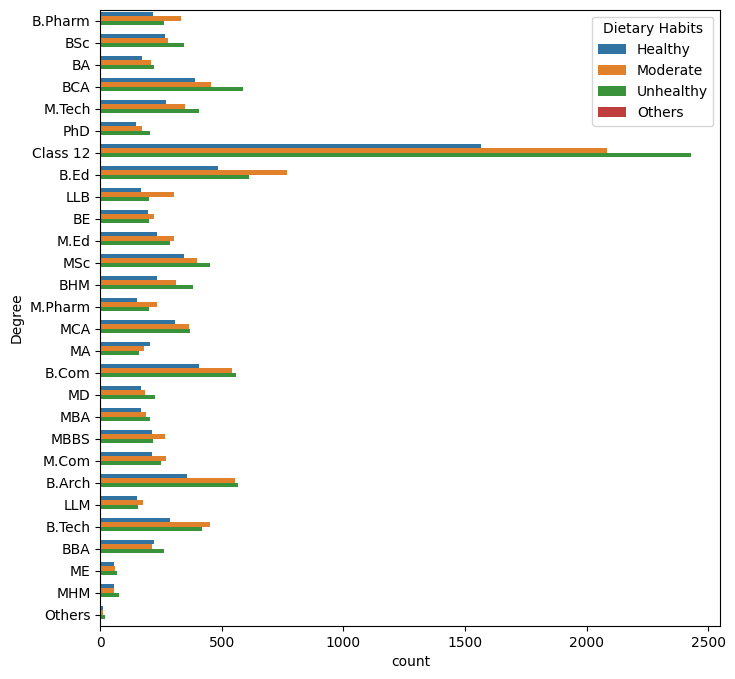

In [53]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,y=data['Degree'],hue='Dietary Habits')

<Axes: xlabel='count', ylabel='Degree'>

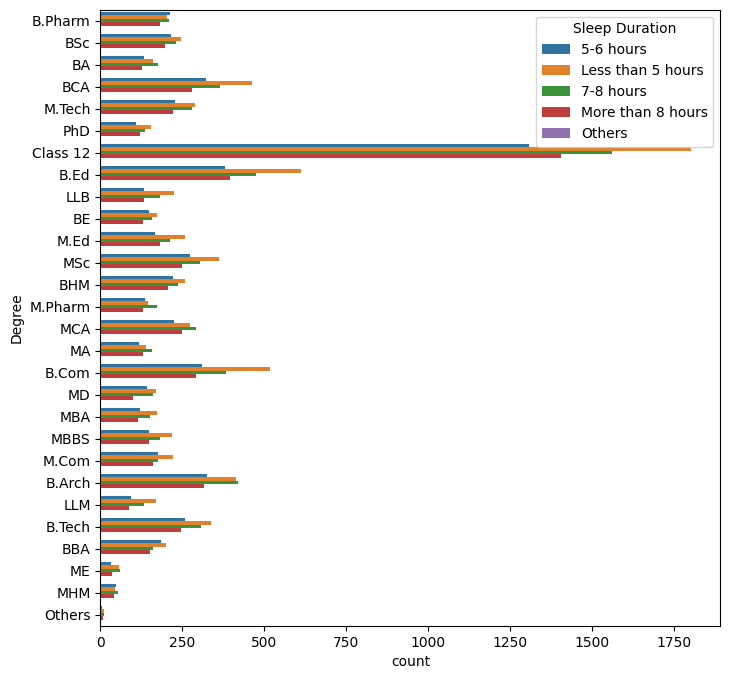

In [54]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,y=data['Degree'],hue='Sleep Duration')

<Axes: xlabel='count', ylabel='Degree'>

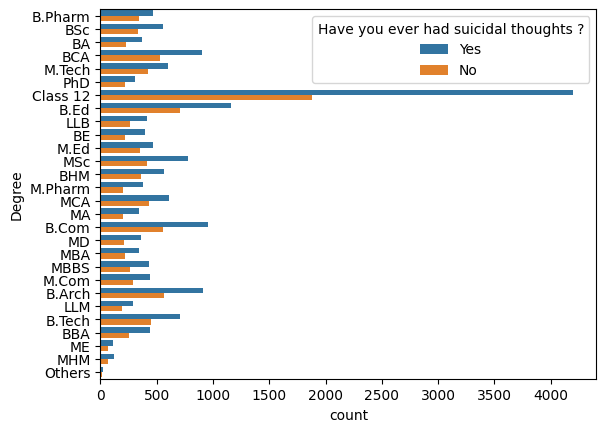

In [55]:

sns.countplot(data=data,y=data['Degree'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Depression', ylabel='count'>

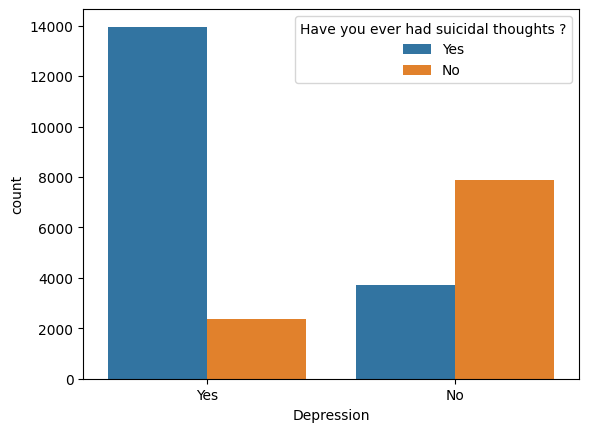

In [56]:
sns.countplot(data=data,x=data['Depression'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Gender', ylabel='count'>

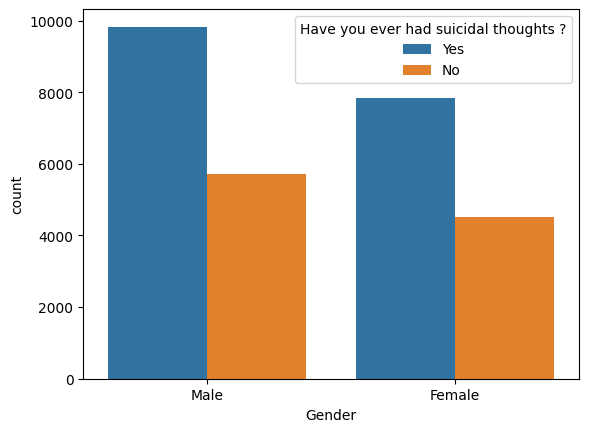

In [57]:
sns.countplot(data=data,x=data['Gender'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Work/Study Hours', ylabel='count'>

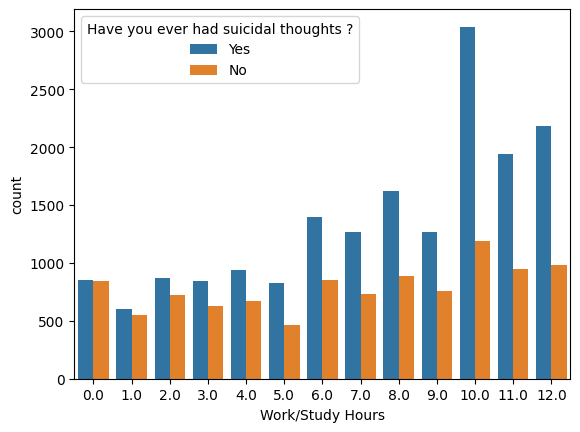

In [58]:

sns.countplot(data=data,x=data['Work/Study Hours'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Sleep Duration', ylabel='count'>

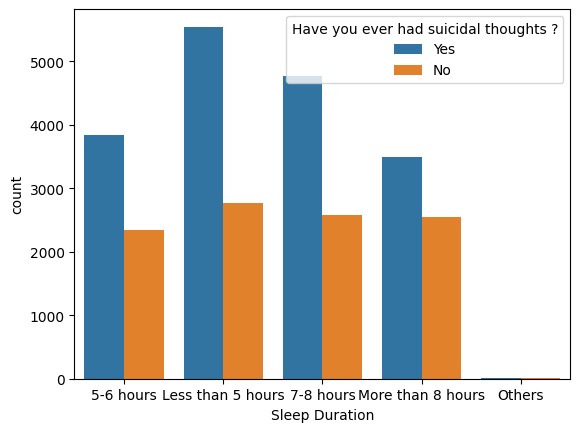

In [59]:
sns.countplot(data=data,x=data['Sleep Duration'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Financial Stress', ylabel='count'>

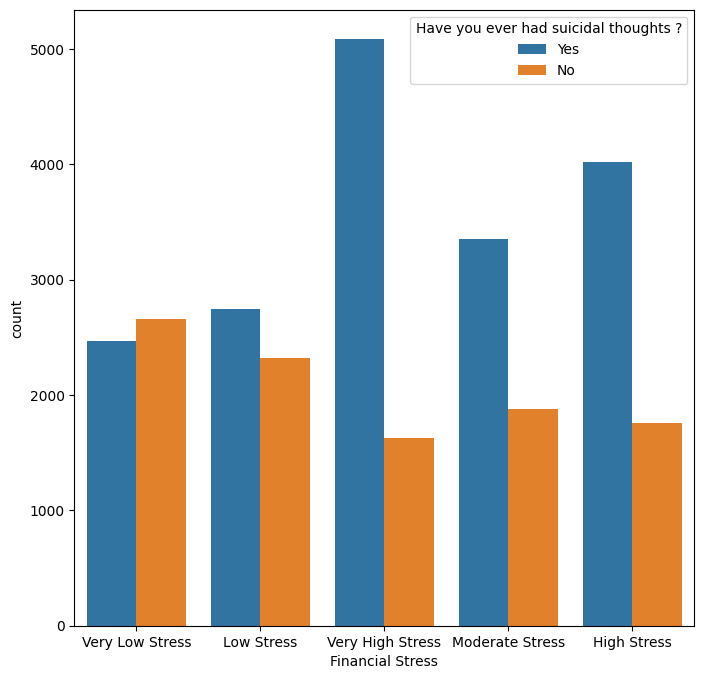

In [60]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,x=data['Financial Stress'],hue='Have you ever had suicidal thoughts ?')

<Axes: xlabel='Depression', ylabel='count'>

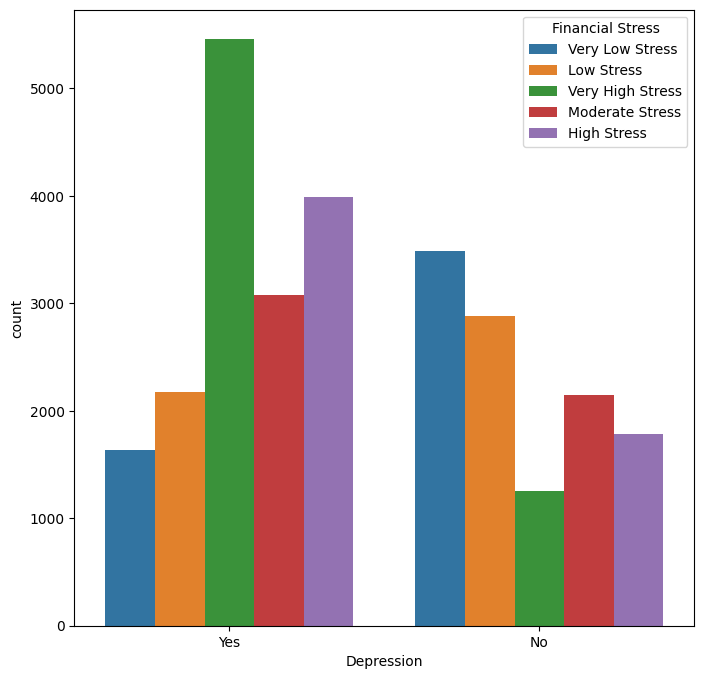

In [61]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,x=data['Depression'],hue='Financial Stress')

<Axes: xlabel='Financial Stress', ylabel='count'>

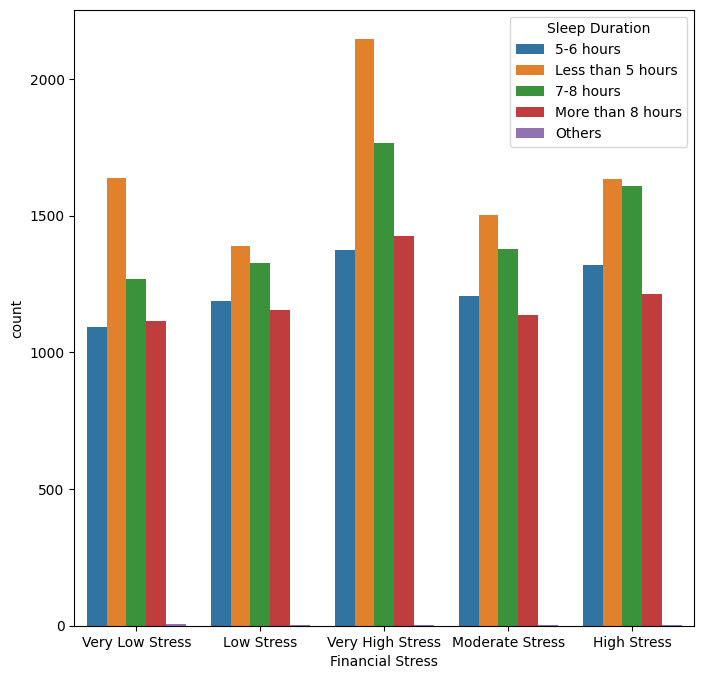

In [62]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,x=data['Financial Stress'],hue='Sleep Duration')

<Axes: xlabel='Financial Stress', ylabel='count'>

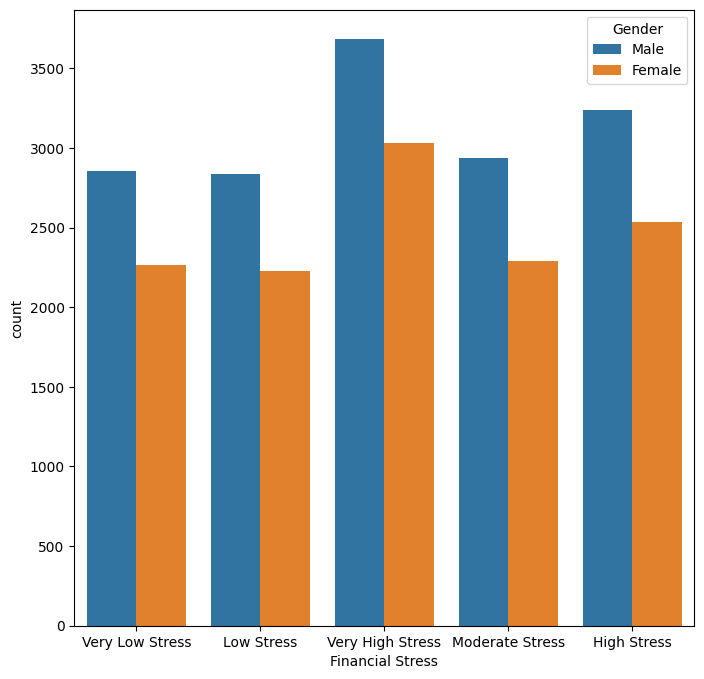

In [63]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data,x=data['Financial Stress'],hue='Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Work/Study Hours', ylabel='Count'>

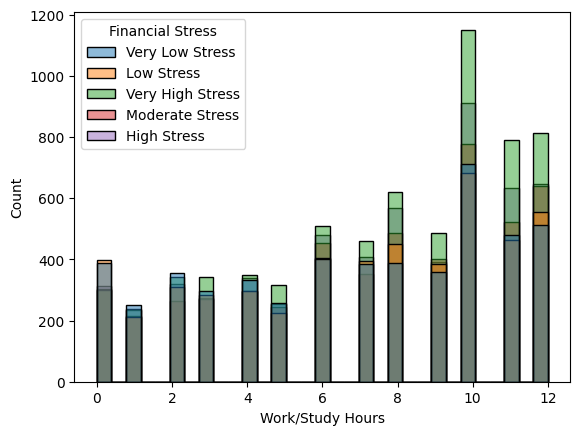

In [64]:
sns.histplot(data=data,x=data['Work/Study Hours'],hue='Financial Stress')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

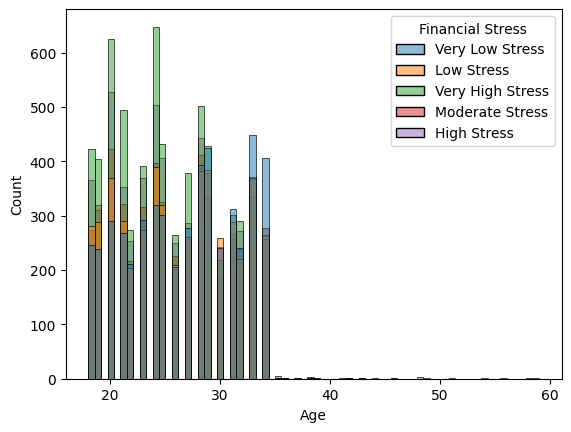

In [65]:
sns.histplot(data=data,x=data['Age'],hue='Financial Stress')

<Axes: xlabel='Depression', ylabel='count'>

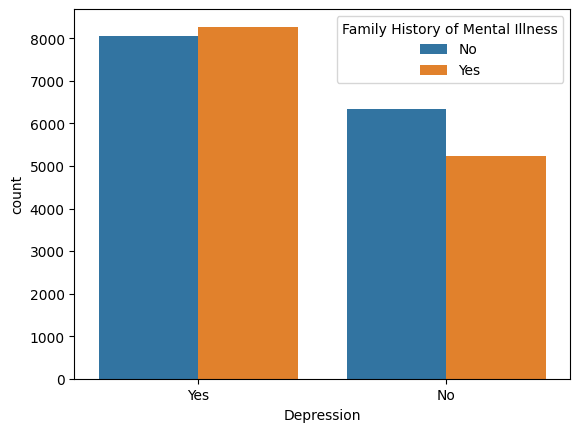

In [66]:

sns.countplot(data=data,x=data['Depression'],hue='Family History of Mental Illness')

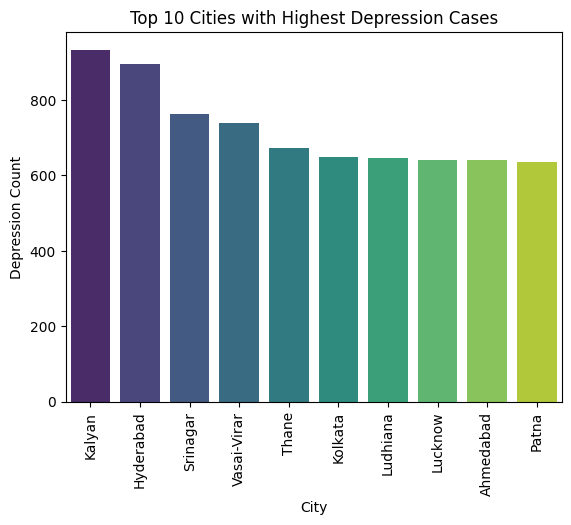

In [67]:
data2 = data[data['Depression'] == 'Yes']
dt = data2.groupby('City')['Depression'].count().reset_index(name='Depression Count')
dt = dt.sort_values(by='Depression Count', ascending=False).head(10)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=dt, x='City', y='Depression Count', palette='viridis')
plt.xlabel('City')
plt.ylabel('Depression Count')
plt.title('Top 10 Cities with Highest Depression Cases')
plt.xticks(rotation=90) 
plt.show()


<Axes: xlabel='Depression', ylabel='count'>

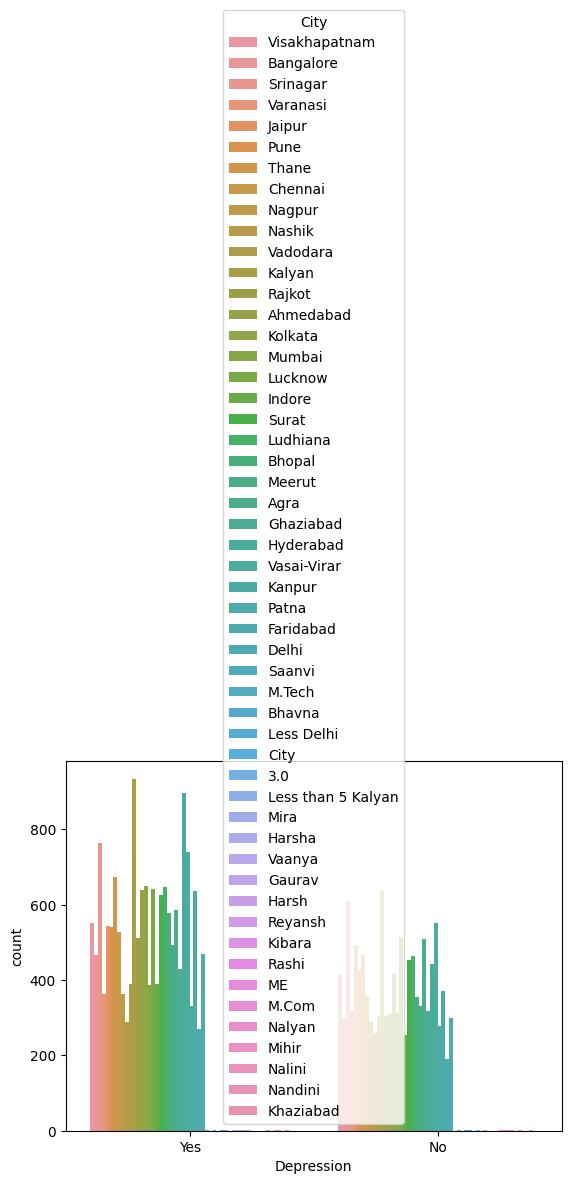

In [68]:
sns.countplot(data=data,x=data['Depression'],hue='City')

<Axes: >

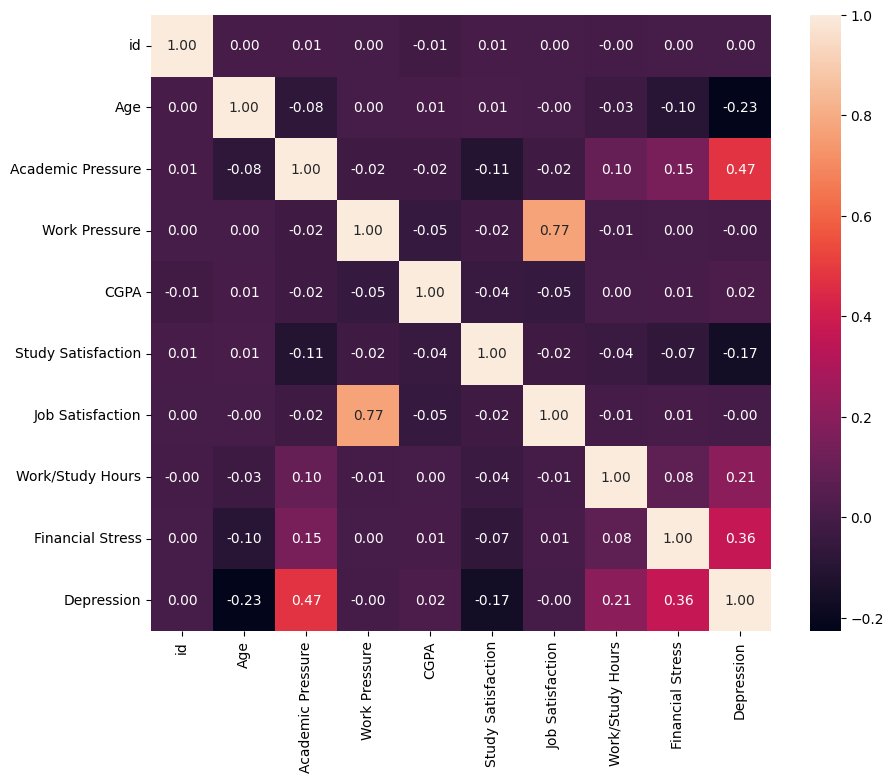

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(),annot=True,fmt='.2f')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

# Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col]=le.fit_transform(df[col])

In [72]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


# Features Selection

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(df.drop('Depression', axis=1), df['Depression'])
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df.drop('Depression', axis=1).columns, 'Importance': importances})
selected_features = feature_importance_df.sort_values(by='Importance', ascending=False)
new_data=df[['Have you ever had suicidal thoughts ?','Academic Pressure','Financial Stress','Work/Study Hours','Sleep Duration','Study Satisfaction']]

In [74]:
X=new_data

In [75]:
y=df['Depression']

# Data spliting

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape

(22318, 6)

In [78]:
X_test.shape

(5580, 6)

# Min-Max Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
X_train_scaled 

array([[0.        , 0.4       , 0.        , 0.75      , 0.5       ,
        0.8       ],
       [1.        , 1.        , 0.5       , 0.83333333, 0.25      ,
        0.4       ],
       [1.        , 0.6       , 0.75      , 0.91666667, 0.25      ,
        0.8       ],
       ...,
       [1.        , 1.        , 1.        , 0.5       , 0.5       ,
        0.6       ],
       [0.        , 0.4       , 1.        , 0.83333333, 0.        ,
        0.4       ],
       [1.        , 0.4       , 1.        , 0.66666667, 0.        ,
        1.        ]])

In [81]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)  
y_pred = rf_model.predict(X_test_scaled)


In [82]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7987
Confusion Matrix:
[[1696  652]
 [ 471 2761]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2348
           1       0.81      0.85      0.83      3232

    accuracy                           0.80      5580
   macro avg       0.80      0.79      0.79      5580
weighted avg       0.80      0.80      0.80      5580

